<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/M%C3%A1ximos_e_m%C3%ADnimos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cálculo Numérico**

José Claudinei Ferreira

Uiversidade Federal de Alfenas

#**Máximos e mínimos de funções**

Considere a função $$f(u)=7u^6+3u^2+2u-1.$$

In [ ]:
def f(u):
  p=7*u**6+3*u**2+2*u-1
  return p

A derivda $$f'(u)=42u^5+6u+2$$ nos diz o comprortamento de $f(u)$, sendo que $f(u)$ cresce quando $u$ varia no sentido de $f'(u)$.

Por exemplo, se $u=1$, temos que $f'(1)=50>0$ e que $f(1+h)>f(1)$, para $0<h<r$, algum $r>0$. Ou seja, quando $u$ cresce, em torno de $1$, temos que $f(u)$ também cresce.




Por simplicidade de notação vamos escrever $F(u)=f'(u)$.

In [ ]:
def F(u):
  p=42*u**5+6*u+2
  return p

F(3)

10226

Vamos então seguir na direção oposta a de $F(u)$ para que $f(u)$ decresça.

Para isso, vamos usar o método de Euler para minimização local de $f(u)$, ou seja, para resolver a equação diferencial ordinária
$$\begin{cases}x'(t)&=&-F(x(t))\\x(0)&=&3\end{cases},\tag{1}$$ que nos dá um trajeto $x(t)$ (sobre o eixo $x$), em função do tempo $t$,  em que $f(x(t))$ decresça. Vamos iniciar no ponto $u_0=3$.

In [ ]:
u=3
n=20000
h=0.0001

for i in range(0,n):
  u=u-h*F(u)

print('Ponto de mínimo local aproximado u=',u,'\n f(u)=', f(u),'\n F(u)=',F(u))


Ponto de mínimo local aproximado u= -0.3124785606259287 
 f(u)= -1.3255119937779427 
 F(u)= 1.8133039074719193e-06


**Obs:** É preciso ter cuidado na escolha de $n$ e de $h$, porque podem ocorrer números muito grandes no processo. A dica e fazer poucas iterações para testar o método e ir diminuindo $h$ e aumentando $n$.

Vejamos o gráfico de $f(u)$:

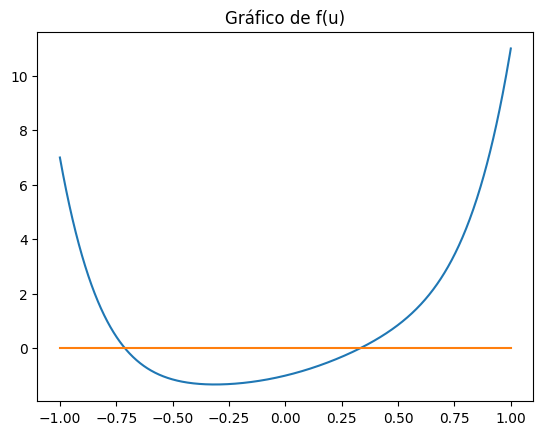

In [ ]:
import numpy as np, matplotlib.pyplot as plt

x=np.linspace(-1,1,1000)
y=f(x)

plt.plot(x,y)
plt.plot(x,0*x)
plt.title('Gráfico de f(u)')
plt.show()

Essa imagem sugere que $f(u)$ possui um único mínimo local, portanto um mínimo global.

Vemos que esse é o caso, olhando para o gráfico da derivada $F(u)=f'(u)$. Porque $f'(u)$ é nula em apenas um ponto.

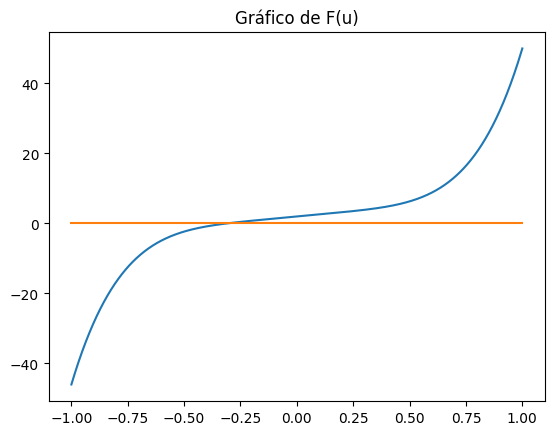

In [ ]:
plt.plot(x,F(x))
plt.plot(x,0*x)
plt.title('Gráfico de F(u)')
plt.show()

**Observando como $f(u)$ decresce no trajeto dado pela Expressão $(1)$.**

Ponto de mínimo local aproximado u= -0.3124785606259287 
 f(u[n])= -1.3255119937779427 
 F(u)= 1.8133039074719193e-06


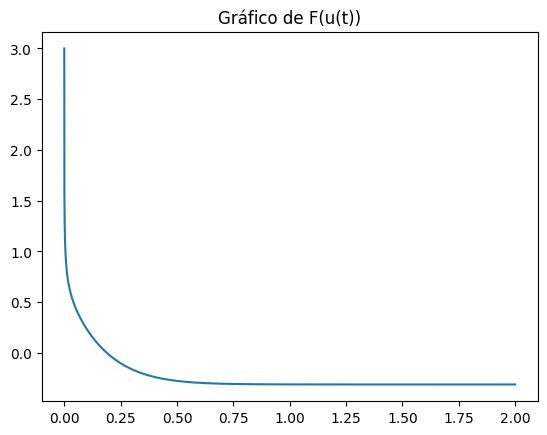

In [ ]:
u=3
n=20000
h=0.0001

u=[3]

for i in range(0,n):
  u.append(u[i]-h*F(u[i]))

print('Ponto de mínimo local aproximado u=',u[n],'\n f(u[n])=', f(u[n]),'\n F(u)=',F(u[n]))

t=np.linspace(0,n*h,n+1)

plt.plot(t,u)
plt.title('Gráfico de F(u(t))')
plt.show()

#**Raízes da equação $f(u)=0$.**

Lembramos que $$f(u)=7u^6+3u^2+2u-1.$$

Para resolvermos a equação $$f(u)=0,\tag{2}$$ podemos usar a ideia que iniciamos na seção anterior.

Para isso, definimos uma função auxiliar $$g(u)=\frac{1}{2}|f(u)|^2,$$ cujos pontos de mínimo são raízes da Equação  $(2)$.

Segue que $g'(u)=f'(u)f(u)$.

In [ ]:
def g(u):
  p=f(u)*f(u)/2
  return p

def dg(u):
  p=F(u)*f(u)  # F(u)=f'(u)
  return p

Vamos resolver a equação $$\begin{cases}x'(t)&=&-g'(x(t))\\x(0)&=&0\end{cases},\tag{3}$$ pelo método de Euler.

In [ ]:
n=100
h=0.1

u=[0]      # Condição inicial

for i in range(0,n+1):
  u.append(u[i-1]-h*dg(u[i-1]))

print('Ponto de mínimo local de g(u), u=',u[n],'\n Derivadade g(u)=', dg(u[n]),'\n Valor de g(u)=',g(u[n]),'\n Valor de f(u)=',f(u[n]))

Ponto de mínimo local de g(u), u= 0.3310267578737868 
 Derivadade g(u)= 8.234803436638748e-08 
 Valor de g(u)= 1.9657633553915882e-16 
 Valor de f(u)= 1.9828077846284486e-08


Encontramos um candidado a mínimo local, que é um mínimo global.

Veja o gráfico a seguir:

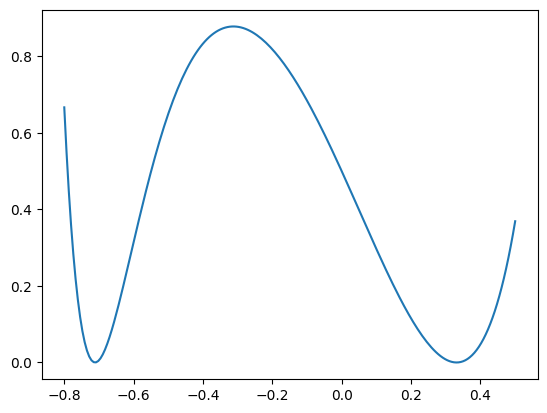

In [ ]:
x=np.linspace(-0.8,0.5,200)
y=g(x)
plt.plot(x,y)
plt.show()

Para encontrarmos o outro ponto de mínimo de $g(u)$, trocamos a condição incial na Equação $(3)$, por $x(0)=-1$, por exemplo. mas precisamos que $h$ seja bem menor e $n$ muito maior:

In [ ]:
n=1000
h=0.001

u=[-1]      # Condição inicial

for i in range(0,n+1):
  u.append(u[i-1]-h*dg(u[i-1]))

print('Ponto de mínimo local de g(u), u=',u[n],'\n Derivadade g(u)=', dg(u[n]),'\n Valor de g(u)=',g(u[n]),'\n Valor de f(u)=',f(u[n]))

Ponto de mínimo local de g(u), u= -0.7111141857151985 
 Derivadade g(u)= 5.497876204672676e-14 
 Valor de g(u)= 1.5407439555097887e-29 
 Valor de f(u)= -5.551115123125783e-15


#**Outro exemplo:**

Resolver a equação:
$$sen^2(x)+\ln(2)+\cos(x)=0.$$


Tome $$f(x)=sen^2(x)+\ln(2)+\cos(x):$$

In [ ]:
def f(x):
  p=np.sin(x)**2+np.log(2)+np.cos(x)
  return p

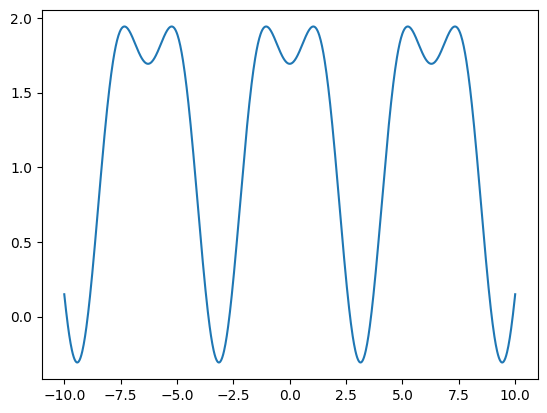

In [ ]:
x=np.linspace(-10,10,1000)
y=f(x)

plt.plot(x,y)
plt.show()

Segue que $f'(x)=2sen(x)\cos(x)-sen(x).$

In [ ]:
def df(x):
  p=2*np.sin(x)*np.cos(x)-np.sin(x)
  return p

Basta resolver a equação $$\begin{cases}x'(t)&=&-g'(x(t))\\x(0)&=&x_0\end{cases},\tag{*}$$ em que $$g(u)=\frac{1}{2}|f(u)|^2 $$ e $$g'(u)=f'(u)f(u).$$

In [ ]:
def g(u):
  return f(u)*f(u)/2

def dg(u):
  return df(u)*f(u)

Resolvendo a Equação Diferencial $(*)$ pelo método de Euler, com $x_0=10$.

In [ ]:
n=1000
h=0.1
u=10

for i in range(0,n):
  u=u-h*dg(u)           # Método de Euler

print('u=',u,'\n f(u)=',f(u))


u= 9.889450983526935 
 f(u)= 6.661338147750939e-15


Resolvendo a Equação Diferencial $(*)$ pelo método de Euler, com $x_0=2$.

In [ ]:
n=1000
h=0.1
u=2

for i in range(0,n):
  u=u-h*dg(u)           # Método de Euler

print('u=',u,'\n f(u)=',f(u))


u= 2.6769196308322423 
 f(u)= 1.6653345369377348e-15


#**O método de Newton**

Se olharmos para a equação $$\begin{cases}x'(t)&=&-g'(x(t))\\x(0)&=&x_0\end{cases},\tag{4}$$ em que $$g(u)=\frac{1}{2}|f(u)|^2 $$ e $$g'(u)=f'(u)f(u).$$ Conluímos que a curva $x(t)$ que é solução da Equação $(4)$ é tal que, se $k(t)=g(x(t))$, então,pela regra da cadeia
$$\begin{cases}k'(t)&=&g'(x(t))\color{blue}{x'(t)}\\\\
&=&\color{blue}{-g'(x(t))}g'(x(t))\\\\&=&-|g'(x(t))|^2\\\\&\leq& 0\end{cases},$$ ou seja, $k(t)$ é uma função decerscente.

**Escolhendo outro caminho para minimização**

Isso sugere que podemos tentar fazer alterações na Equação $(4)$ para obter outras possibilidades de minimizar $g(u)$.

Uma dessas possibilidades, com algumas condições extras sobre $f(u)$, é tomarmos a equação $$\begin{cases}x'(t)&=&-\left[f'(x(t))\right]^{-1}f(x(t))\\x(0)&=&x_0\end{cases},\tag{5}$$
quando $f'(x(t))$ não for nula.

Agora, se a curva $x(t)$ que é solução da Equação $(5)$ é tal que, se $k(t)=g(x(t))$, então
$$\begin{cases}k'(t)&=&g'(x(t))\color{blue}{x'(t)}\\\\
&=&f(x(t))f'(x(t))\color{blue}{[-\left[f'(x(t))\right]^{-1}f(x(t))]}\\\\&=&-f(x(t))f(x(t))\\\\&=&-2|g(x(t))|^2\\\\&=&-2k(t)\\\\&\leq& 0\end{cases},$$ ou seja, $k(t)$ é uma função decerscente. Em particular, $$k(t)=g(x_0)e^{-2t},$$ desde que $f(x(t))\neq 0$.

O método de Euler para resolver a Equação $(5)$ é chamado de método de Newton para resolver a equação $f(u)=0$.

Voltando a equação função $f(u)$ deste texto, vamos resolver numéricamente a Equação $(5)$ pelo método de Euler (ou resolver a equação $f(u)=0$ pelo método de Newton).

Tomando $x(0)=0$:

In [ ]:
n=10
u=[0]   # Condição inicial
h=1

for i in range(0,n):
  u.append(u[i]-h*f(u[i])/F(u[i]))   # Método de Euler para a Equação (5), ou método de Newton.


print('Ponto de mínimo local de g(u), u=',u[n],'\n Derivadade g(u)=', dg(u[n]),'\n Valor de g(u)=',g(u[n]),
      '\n Valor de f(u)=',f(u[n]),'\n Derivada de f(u)=',F(u[n]))

Ponto de mínimo local de g(u), u= 0.3310267530995056 
 Derivadade g(u)= -4.610869676795695e-16 
 Valor de g(u)= 6.162975822039155e-33 
 Valor de f(u)= -1.1102230246251565e-16 
 Derivada de f(u)= 4.153102191654202


Tomando $x(0)=-1$:

In [ ]:
n=10
u=[-1]   # Condição inicial
h=1

for i in range(0,n):
  u.append(u[i]-h*f(u[i])/F(u[i]))   # Método de Euler para a Equação (5), ou método de Newton.


print('Ponto de mínimo local de g(u), u=',u[n],'\n Derivadade g(u)=', dg(u[n]),'\n Valor de g(u)=',g(u[n]),
      '\n Valor de f(u)=',f(u[n]),'\n Derivada de f(u)=',F(u[n]))

Ponto de mínimo local de g(u), u= -0.711114185715199 
 Derivadade g(u)= -0.0 
 Valor de g(u)= 0.0 
 Valor de f(u)= 0.0 
 Derivada de f(u)= -9.904093290677226


Observe que a convergência é muito mais rápida, e $h$ pode ser maior e $n$ menor, na maioria dos casos.

#**Outro exemplo:**

Resolver a equação:
$$sen^2(x)+\ln(2)+\cos(x)=0.$$


Tome $$f(x)=sen^2(x)+\ln(2)+\cos(x):$$

In [10]:
def f(x):
  p=np.sin(x)**2+np.log(2)+np.cos(x)
  return p

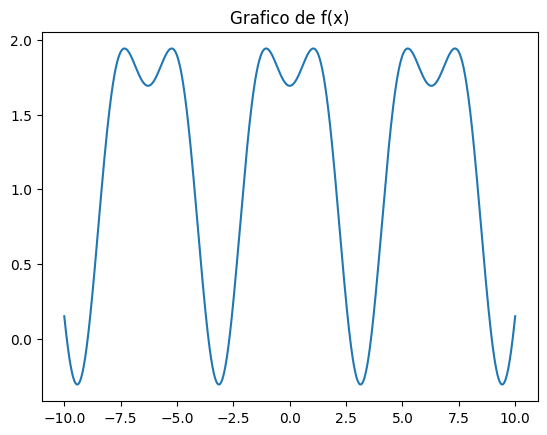

In [11]:
x=np.linspace(-10,10,1000)
y=f(x)

plt.plot(x,y)
plt.title('Grafico de f(x)')
plt.show()

Segue que $f'(x)=2sen(x)\cos(x)-sen(x).$

In [14]:
def df(x):
  p=2*np.sin(x)*np.cos(x)-np.sin(x)
  return p

Basta resolver a equação $$\begin{cases}x'(t)&=&-\frac{f(x(t))}{f'(x(t))}\\x(0)&=&x_0\end{cases},\tag{*}$$ para minimizar $$g(u)=\frac{1}{2}|f(u)|^2. $$

Resolvendo a Equação Diferencial $(*)$ pelo método de Euler, com $x_0=10$.

In [16]:
n=10
h=1
u=10

for i in range(0,n):
  u=u-h*f(u)/df(u)          # Método de Euler

print('Uma solução de $f(u)=0 é \n u=',u,'\n pois f(u)=',f(u))


Uma solução de $f(u)=0 é 
 u= 9.88945098352693 
 pois f(u)= 0.0


Resolvendo a Equação Diferencial $(*)$ pelo método de Euler, com $x_0=2$.

In [17]:
n=10
h=1
u=2

for i in range(0,n):
  u=u-h*f(u)/df(u)          # Método de Euler

print('Uma solução de $f(u)=0 é \n u=',u,'\n pois f(u)=',f(u))


Uma solução de $f(u)=0 é 
 u= 2.6769196308322436 
 pois f(u)= 1.1102230246251565e-16


Para outras soluções escolha outros valores de $x_0$.